In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [2]:
df=pd.read_excel('Rocket_Loans.xlsx')

In [3]:
df.head()

,Loan_ID,Sex,Age,Married,No. of People in the Family,Qualification,Self_Employed,Loan_Bearer_Income,Loan_Cobearer_Income,Amount Disbursed,Loan_Tenure,Credit_Score,Location_type,Loan_Status
0,LP001002,Male,33,No,0,Graduate,No,5849,0.0,108.0,360.0,1.0,Urban,Y
1,LP001003,Male,34,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,31,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,33,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,48,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Loan_ID                      614 non-null    object 
 1   Sex                          601 non-null    object 
 2   Age                          614 non-null    int64  
 3   Married                      611 non-null    object 
 4   No. of People in the Family  599 non-null    object 
 5   Qualification                614 non-null    object 
 6   Self_Employed                582 non-null    object 
 7   Loan_Bearer_Income           614 non-null    int64  
 8   Loan_Cobearer_Income         614 non-null    float64
 9   Amount Disbursed             593 non-null    float64
 10  Loan_Tenure                  600 non-null    float64
 11  Credit_Score                 564 non-null    float64
 12  Location_type                614 non-null    object 
 13  Loan_Status         

In [5]:
df.dtypes

Loan_ID                         object
Sex                             object
Age                              int64
Married                         object
No. of People in the Family     object
Qualification                   object
Self_Employed                   object
Loan_Bearer_Income               int64
Loan_Cobearer_Income           float64
Amount Disbursed               float64
Loan_Tenure                    float64
Credit_Score                   float64
Location_type                   object
Loan_Status                     object
dtype: object

### 1b) Convert nominal features into factors with numerical value mapped to each value

In [6]:
df1=df.copy()
df1['No. of People in the Family'].unique()

array([0, 1, 2, '3+', nan], dtype=object)

In [7]:
df1['No. of People in the Family']=df1['No. of People in the Family'].replace('3+',3)

In [8]:
df1['No. of People in the Family']=df1['No. of People in the Family'].astype(float)

In [9]:
le=LabelEncoder()

In [10]:
for i in df1.columns:
    if df1[i].dtype=='object':
        df1[i]=le.fit_transform(df1[i])

In [11]:
df1.head()

,Loan_ID,Sex,Age,Married,No. of People in the Family,Qualification,Self_Employed,Loan_Bearer_Income,Loan_Cobearer_Income,Amount Disbursed,Loan_Tenure,Credit_Score,Location_type,Loan_Status
0,0,1,33,0,0.0,0,0,5849,0.0,108.0,360.0,1.0,2,1
1,1,1,34,1,1.0,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,2,1,31,1,0.0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,3,1,33,1,0.0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,4,1,48,0,0.0,0,0,6000,0.0,141.0,360.0,1.0,2,1


### 1. a) Check for missing values in the dataset. Apply appropriate imputation techniques if dataset has missing values

In [12]:
df1.isna().sum()

Loan_ID                         0
Sex                             0
Age                             0
Married                         0
No. of People in the Family    15
Qualification                   0
Self_Employed                   0
Loan_Bearer_Income              0
Loan_Cobearer_Income            0
Amount Disbursed               21
Loan_Tenure                    14
Credit_Score                   50
Location_type                   0
Loan_Status                     0
dtype: int64

In [13]:
imputer=KNNImputer(n_neighbors=2)
for i in df1.columns:
    if df1[i].isna().sum()!=0:
        df1[i]=imputer.fit_transform(df1[[i]])

In [14]:
df1.isna().sum()

Loan_ID                        0
Sex                            0
Age                            0
Married                        0
No. of People in the Family    0
Qualification                  0
Self_Employed                  0
Loan_Bearer_Income             0
Loan_Cobearer_Income           0
Amount Disbursed               0
Loan_Tenure                    0
Credit_Score                   0
Location_type                  0
Loan_Status                    0
dtype: int64

###  c) Check for outliers in the dataset if any

Loan_ID has outliers
Sex has outliers
Age has outliers
Married has outliers
No. of People in the Family has outliers
Qualification has outliers
Self_Employed has outliers
Loan_Bearer_Income has outliers
Loan_Cobearer_Income has outliers
Amount Disbursed has outliers
Loan_Tenure has outliers
Credit_Score has outliers
Location_type has outliers
Loan_Status has outliers


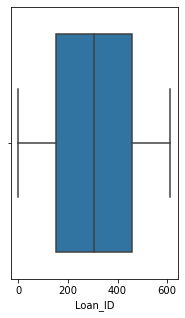

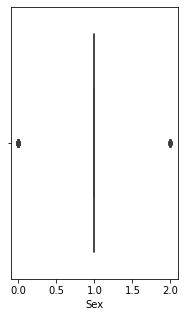

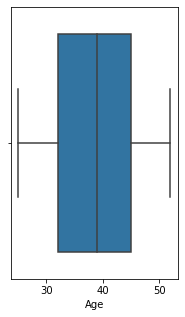

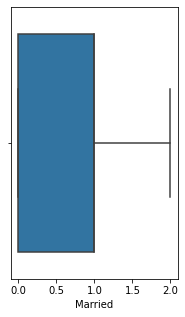

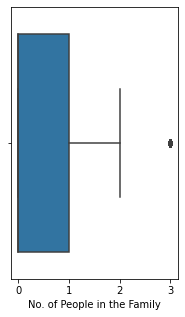

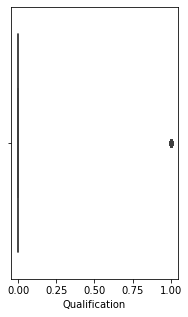

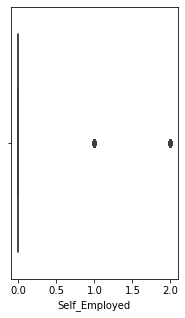

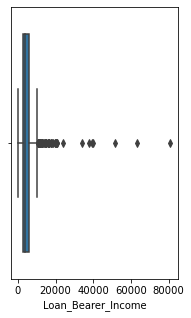

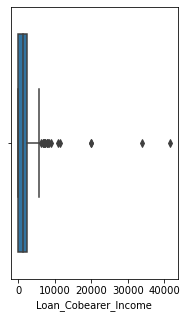

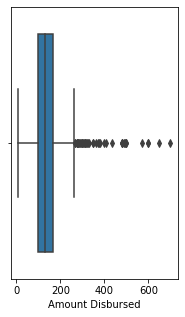

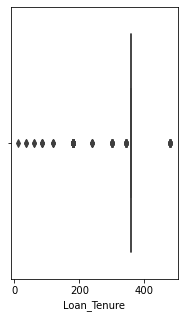

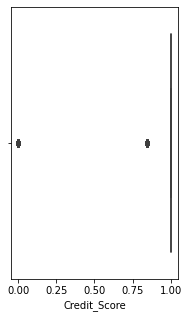

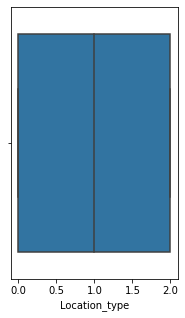

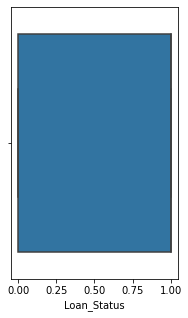

In [15]:
for i in df1.columns:
    q1=df1[i].quantile(0.25)
    q3=df1[i].quantile(0.75)
    iqr=q3-q1
    lw=q1-1.5*iqr
    uw=q3+1.5*iqr
    if len((df1[i]<lw) | (df1[i]>uw))>0:
        print(f'{i} has outliers') 
        plt.figure(figsize=(3,5))
        sns.boxplot(df1[i])
    else:
        print(f'{i} does not have outliers')

### 2. Find loan approval rate for applicants having credit score (i.e. 1)

In [16]:
df1['Credit_Score'].value_counts()

1.000000    475
0.000000     89
0.842199     50
Name: Credit_Score, dtype: int64

In [17]:
credit_score1=df1[df1.Credit_Score==1]

In [18]:
loan_status1=df1[df1.Credit_Score==1][df1.Loan_Status==1]

In [19]:
len(loan_status1)

378

In [20]:
len(credit_score1)

475

In [21]:
approval_rate=(len(loan_status1)/len(credit_score1))*100
approval_rate

79.57894736842105

### 3. Give frequency distribution of total income for each group below.(i.e. Total Income = Loan_bearer_income + Loan_Cobearer_income)
 #- Below 5k
 #- 5k to 10k
 #- 10k to 15k
 #- Above 15k

In [22]:
df1['Total_Income']=df1['Loan_Bearer_Income']+df1['Loan_Cobearer_Income']

In [23]:
a=0
b=0
c=0
d=0
for i in df1.Total_Income:
    if i<=5000:
        a+=1
    elif 5000<=i<=10000:
        b+=1
    elif 10000<=i<=15000:
        c+=1
    else:
        d+=1

In [24]:
freq_dist=[a,b,c,d]
freq_dist=pd.DataFrame(data=freq_dist,columns=['Frequency'],index=['<=5K','5K-10K','10K-15K','>15K'])

In [25]:
freq_dist

,Frequency
<=5K,270
5K-10K,257
10K-15K,51
>15K,36


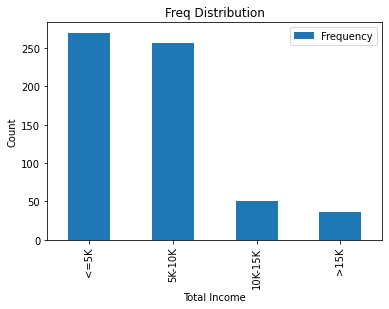

In [26]:
freq_dist.plot(kind='bar')
plt.xlabel('Total Income')
plt.ylabel('Count')
plt.title('Freq Distribution')
plt.show()

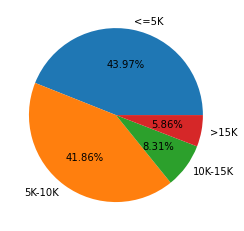

In [27]:
plt.pie(freq_dist['Frequency'],labels=['<=5K','5K-10K','10K-15K','>15K'],autopct='%.2f%%')
plt.show()

### 4. Which independent variable have high correlation with dependent variable?

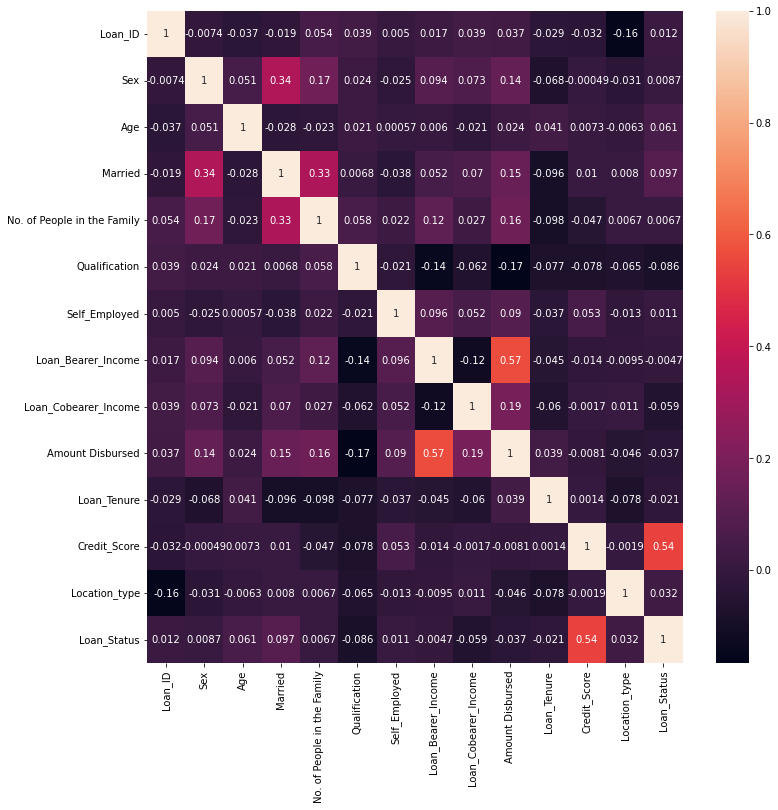

In [28]:
plt.figure(figsize=(12,12))
sns.heatmap(df1.drop('Total_Income',axis=1).corr(),annot=True)
plt.show()

#### Credit_Score has high correlation with Loan_Status

### 5. Model the data using any classification algorithm and explain the evaluation metrics used. (Split the dataset into train (80%) and test (20%))

In [29]:
X=df1.drop('Loan_Status',axis=1)
y=df1['Loan_Status']

In [30]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [31]:
model1=Sequential([
    Dense(20000,activation='relu',input_shape=(X_train.shape[1],),kernel_regularizer=tf.keras.regularizers.L1(0.1)),
    Dense(9000,activation='relu'),
    Dense(5000,activation='tanh'),
    Dense(5000,activation='relu'),
    Dense(1,activation='sigmoid')])

In [32]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20000)             300000    
                                                                 
 dense_1 (Dense)             (None, 9000)              180009000 
                                                                 
 dense_2 (Dense)             (None, 5000)              45005000  
                                                                 
 dense_3 (Dense)             (None, 5000)              25005000  
                                                                 
 dense_4 (Dense)             (None, 1)                 5001      
                                                                 
Total params: 250,324,001
Trainable params: 250,324,001
Non-trainable params: 0
_________________________________________________________________


In [33]:
model1.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [34]:
history=model1.fit(X_train,y_train,batch_size=500,epochs=10,validation_data=(X_test,y_test))

Epoch 1/10
1/1 [==============================] - 4s 4s/step - loss: 243.4550 - accuracy: 0.3116 - val_loss: 240.3662 - val_accuracy: 0.6829
Epoch 2/10
1/1 [==============================] - 3s 3s/step - loss: 239.9893 - accuracy: 0.6884 - val_loss: 203.7133 - val_accuracy: 0.3171
Epoch 3/10
1/1 [==============================] - 3s 3s/step - loss: 203.6664 - accuracy: 0.3116 - val_loss: 182.5707 - val_accuracy: 0.6829
Epoch 4/10
1/1 [==============================] - 3s 3s/step - loss: 182.4072 - accuracy: 0.6884 - val_loss: 163.0132 - val_accuracy: 0.6829
Epoch 5/10
1/1 [==============================] - 3s 3s/step - loss: 162.8783 - accuracy: 0.6884 - val_loss: 140.8816 - val_accuracy: 0.6829
Epoch 6/10
1/1 [==============================] - 3s 3s/step - loss: 140.7920 - accuracy: 0.6884 - val_loss: 123.4613 - val_accuracy: 0.3171
Epoch 7/10
1/1 [==============================] - 4s 4s/step - loss: 123.4925 - accuracy: 0.3116 - val_loss: 105.2659 - val_accuracy: 0.6829
Epoch 8/10
1/

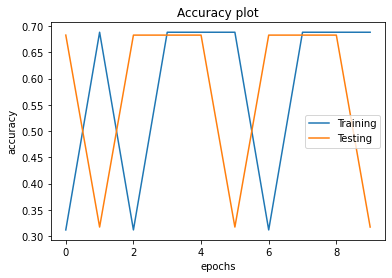

In [35]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Accuracy plot')
plt.legend(['Training','Testing'])

In [36]:
model2=Sequential([
    Dense(20000,activation='relu',input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(10000,activation='relu'),
    Dense(5000,activation='tanh'),
    Dense(5000,activation='relu'),
    Dense(1,activation='sigmoid')])

In [37]:
model2.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history=model2.fit(X_train,y_train,batch_size=500,epochs=10,validation_data=(X_test,y_test))

Epoch 1/10
1/1 [==============================] - 5s 5s/step - loss: 0.7478 - accuracy: 0.4725 - val_loss: 14.9340 - val_accuracy: 0.6829
Epoch 2/10


In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Accuracy plot')
plt.legend(['Training','Testing'])

In [ ]:
model3=Sequential([
    Dense(20000,activation='relu',input_shape=(X_train.shape[1],)),
    Dense(10000,activation='relu'),
    Dense(15000,activation='tanh'),
    Dense(5000,activation='relu'),
    Dense(1,activation='sigmoid')])

In [ ]:
model3.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
es=tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',mode='auto',patience=5,restore_best_weights=False)

In [ ]:
history=model3.fit(X_train,y_train,batch_size=500,epochs=10,validation_data=(X_test,y_test),callbacks=[es])

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Accuracy plot')
plt.legend(['Training','Testing'])